Importing the Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Importing the data

In [3]:
iris = pd.read_excel("Aggregation.xlsx")
x = iris.iloc[:, [0, 1]].values

target = iris.iloc[:,2].values
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)


Viewing the Data

In [4]:
x

array([[14.9 , 27.55],
       [14.45, 28.35],
       [14.15, 28.8 ],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]])

Viewing the target

In [5]:
target

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Ploting the data according to target 

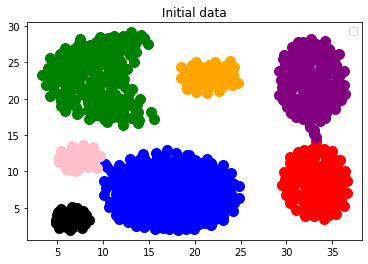

In [6]:
plt.scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
plt.scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
plt.scatter(x[target == 3, 0], x[target == 3, 1], s = 100, c = 'red')
plt.scatter(x[target == 4, 0], x[target == 4, 1], s = 100, c = 'blue')
plt.scatter(x[target == 5, 0], x[target == 5, 1], s = 100, c = 'black')
plt.scatter(x[target == 6, 0], x[target == 6, 1], s = 100, c = 'purple')
plt.scatter(x[target == 7, 0], x[target == 7, 1], s = 100, c = 'pink')
plt.title('Initial data')
#Plotting the centroids of the clusters


plt.legend()
plt.show()

finding the exact value epsilon

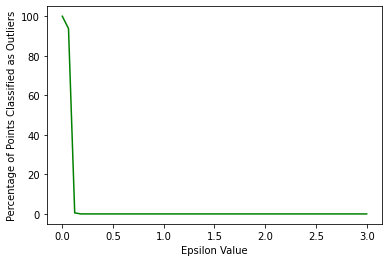

In [7]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=4)
    dbscan.fit(scaled_df)
   
    # Percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");
plt.show()


Applying  DBSCAN

In [8]:
m = DBSCAN(eps=0.2, min_samples=4)
ydbscan=m.fit_predict(scaled_df)

Viewing the the cluster formation

In [9]:
ydbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Ploting the clusturing result

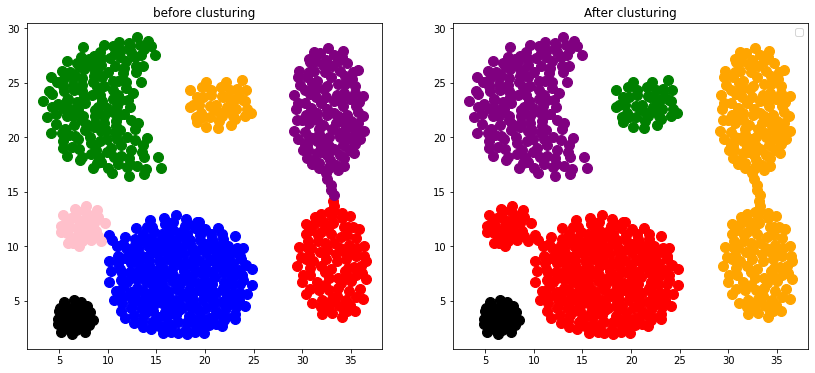

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[1].scatter(x[ydbscan == 0, 0], x[ydbscan == 0, 1], s = 100, c = 'purple')
axes[1].scatter(x[ydbscan == 1, 0], x[ydbscan == 1, 1], s = 100, c = 'red')
axes[1].scatter(x[ydbscan == 2, 0], x[ydbscan == 2, 1], s = 100, c = 'orange')
axes[1].scatter(x[ydbscan == 3, 0], x[ydbscan == 3, 1], s = 100, c = 'green')
axes[1].scatter(x[ydbscan == 4, 0], x[ydbscan == 4, 1], s = 100, c = 'black')

axes[1].set_title('After clusturing')
axes[0].scatter(x[target == 1, 0], x[target == 1, 1], s = 100, c = 'orange')
axes[0].scatter(x[target == 2, 0], x[target == 2, 1], s = 100, c = 'green')
axes[0].scatter(x[target == 3, 0], x[target == 3, 1], s = 100, c = 'red')
axes[0].scatter(x[target == 4, 0], x[target == 4, 1], s = 100, c = 'blue')
axes[0].scatter(x[target == 5, 0], x[target == 5, 1], s = 100, c = 'black')
axes[0].scatter(x[target == 6, 0], x[target == 6, 1], s = 100, c = 'purple')
axes[0].scatter(x[target == 7, 0], x[target == 7, 1], s = 100, c = 'pink')
axes[0].set_title('before clusturing')




plt.legend()
plt.show()

In [11]:
print(pd.crosstab(target,ydbscan))

col_0    0    1    2   3   4
row_0                       
1        0    0    0  45   0
2      169    0    0   0   0
3        0    0  102   0   0
4        0  273    0   0   0
5        0    0    0   0  34
6        0    0  130   0   0
7        0   34    0   0   0
